<a href="https://colab.research.google.com/github/gabrieldorte/analise_data_pib_brasil/blob/main/Projeto_PIB_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from matplotlib import transforms
import plotly.express as px

In [2]:
#DEFINIÇÂO DAS CORES
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [3]:
#LENDO A BASE DE DADOS
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


In [4]:
#ANÁLISE COMPARATIVA PIB 2002 PARA 2020
#CRIANDO O DF PARA ANÀLISE
df_pib_2002 = df_pib.query("ano == 2002")[["regiao", "pib"]]
df_pib_2020 = df_pib.query("ano == 2020")[["regiao", "pib"]]


df_pib_2002 = df_pib_2002.groupby("regiao").sum().sort_values("pib", ascending = False)
df_pib_2020 = df_pib_2020.groupby("regiao").sum().sort_values("pib", ascending = False)
display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


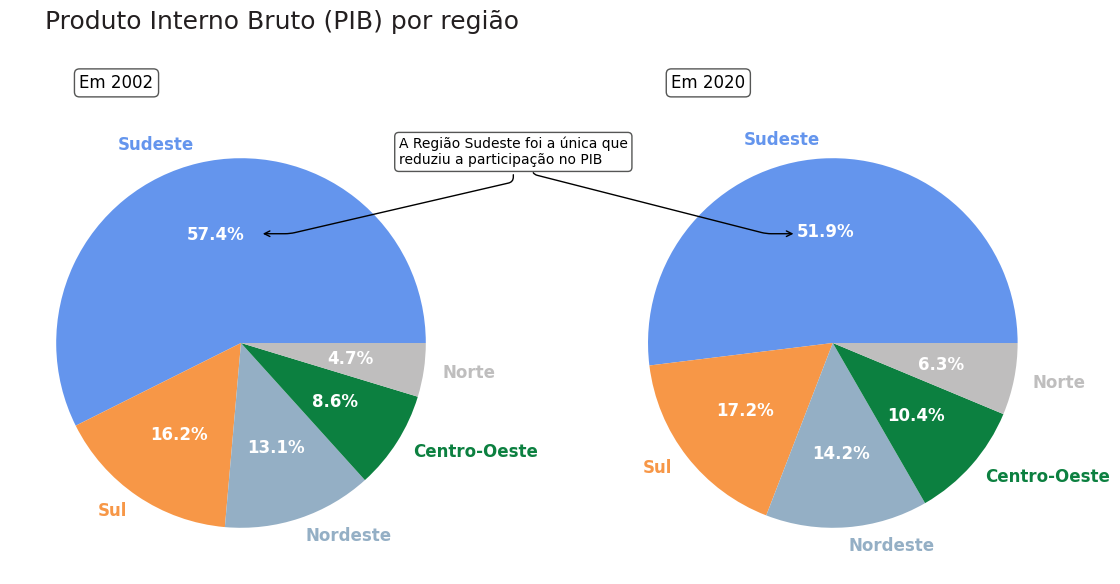

In [5]:
#GERANDO O GRÁFICO DO PIB 2002 COMPARADO COM O 2020

fig, axs = plt.subplots(1, 2, figsize=(14,6))
cores = [AZUL3, LARANJA1, AZUL5 , VERDE1, CINZA5]
plt.suptitle('Produto Interno Bruto (PIB) por região', fontsize=18, color=CINZA1, ha = 'right', x = 0.5, y = 1.05)

# GRÁFICO 1 - PIB de 2002 por região
ptc, text, _ = axs[0].pie(data = df_pib_2002, x = 'pib', labels = df_pib_2002.index, autopct = "%.1f%%",
                          pctdistance = 0.6, textprops = {"size":12, "fontweight":"bold","color": BRANCO},
                          colors = cores)
axs[0].annotate("Em 2002", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#######################################

# GRÁFICO 2 - PIB de 2020 por região
ptc, text, _ = axs[1].pie(data = df_pib_2020, x = 'pib', labels = df_pib_2020.index, autopct = "%.1f%%",
                          pctdistance = 0.6, textprops = {"size":12, "fontweight":"bold","color": BRANCO},
                          colors = cores)
axs[1].annotate("Em 2020", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


axs[0].annotate('A Região Sudeste foi a única que\nreduziu a participação no PIB',
            xy=(180, 245), xycoords='axes points', xytext=(280, 295), textcoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5"))

axs[1].annotate('\n\n', xy=(140, 245), xycoords='axes points', xytext=(-50, 295), textcoords='axes points',
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=-30,rad=5"))

plt.show()

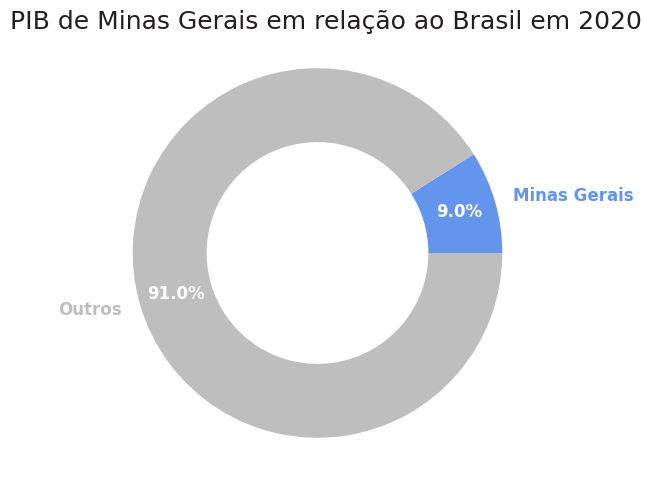

In [6]:
#Contrução Gráfico de rosca

df_mg_2020 = df_pib.query("ano == 2020")[["sigla_uf", "pib"]]
df_mg_2020.loc[df_mg_2020["sigla_uf"] == "MG", "sigla_uf"] = "Minas Gerais"
df_mg_2020.loc[df_mg_2020["sigla_uf"] != "Minas Gerais", "sigla_uf"] = "Outros"
df_mg_2020 = df_mg_2020.groupby('sigla_uf').sum()
df_mg_2020

fig, ax = plt.subplots(figsize=(6,6))
cores = [AZUL3, CINZA5]
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha = 'left', x = 0, y = 0.9)
ptc, text, _ = ax.pie(data = df_mg_2020, x = "pib", labels = df_mg_2020.index, autopct = "%.1f%%",
                     startangle = 0, pctdistance= 0.8, wedgeprops = dict(width = 0.4),
                     textprops = dict(size = 12, fontweight = 'bold', color = BRANCO),
                     colors = cores)
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

In [7]:
#GRÁFICO DE DISTRIBUIÇÂO INTERNA DO PIB BAHIA
bahia = df_pib.query("sigla_uf == 'BA' and ano == 2020")[["pib", "impostos_liquidos", "va"]]
bahia.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Adicionado Bruto"}, inplace=True)
bahia = bahia.melt(var_name = "Indicadores", value_name = "Valores")
bahia.loc[bahia["Indicadores"] == "Impostos Líquidos", "Valores"] = bahia["Valores"]* -1
bahia["Valores_str"] = (bahia["Valores"]/1e9).map("R$ {:,.2f} BI".format)
bahia["Medidas"] = ["absolute", "relative", "total"]
bahia

,Indicadores,Valores,Valores_str,Medidas
0,PIB,305320812691,R$ 305.32 BI,absolute
1,Impostos Líquidos,-37094030606,R$ -37.09 BI,relative
2,Valor Adicionado Bruto,268226782074,R$ 268.23 BI,total


In [8]:
#Gráfico
fig = go.Figure( go.Waterfall(name = "", orientation = "v", measure = bahia["Medidas"],
                             x = bahia["Indicadores"],  y = bahia["Valores"],
                             text = bahia["Valores_str"], textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
              )

fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) da Bahia em 2020' +
                             '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0,380e9], hovermode="closest")
fig.update_yaxes(showticklabels=False)
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")
fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()

In [9]:
#DADOS PARA GRAFICO DE VARIACAO DO PIB DE UM ESTADO
anos = [x for x in range(2010, 2021)]
rio = df_pib.query("sigla_uf == 'RJ' and ano == @anos")[["ano", "pib"]]
rio = rio.reset_index(drop=True)
rio["variacao_pib"] = rio["pib"].diff().fillna(rio["pib"]).astype("int64")
rio["Medidas"] = ["absolute"] + ["relative"] * 10
atualizacao = pd.Series({'ano': 'Total',
                         'pib': rio["pib"].values[-1],
                         'variacao_pib': rio["pib"].values[-1],
                         'Medidas': "total"}).to_frame().T
rio = pd.concat([rio, atualizacao], axis = 0, ignore_index = True).drop(columns = ["pib"])
rio["variacao_pib_texto"] = (rio["variacao_pib"]/1e9).map('R$ {:,.2f} Bi'.format)
rio.rename(columns = {"ano":"Ano", "variacao_pib": "Variação do PIB", "variacao_pib_texto":"Variação do PIB (em texto)"}, inplace=True)
rio

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,449858101109,absolute,R$ 449.86 Bi
1,2011,62909803660,relative,R$ 62.91 Bi
2,2012,62117068361,relative,R$ 62.12 Bi
3,2013,53341096232,relative,R$ 53.34 Bi
4,2014,42850774949,relative,R$ 42.85 Bi
5,2015,-11937892478,relative,R$ -11.94 Bi
6,2016,-18737745386,relative,R$ -18.74 Bi
7,2017,31204461608,relative,R$ 31.20 Bi
8,2018,87253378810,relative,R$ 87.25 Bi
9,2019,21068870219,relative,R$ 21.07 Bi


In [10]:
#GERANDO O GRÁFICO PARA VISUALIZAÇÃO
fig = go.Figure(
                go.Waterfall(name = "", orientation = "v", measure = rio["Medidas"],
                             y = rio["Variação do PIB"], text = rio["Variação do PIB (em texto)"],
                             textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
                )

# Personalizando o gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) do Rio de Janeiro' +
                             '<br><sup size=1 style="color:#555655">De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,850e9])

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=rio["Ano"])

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="O <b>Rio de Janeiro</b> apresentou recuo no PIB<br>em pelo menos 3 anos no período:<br>2015, 2016 e 2020",
                   align="left", axref = 'x', ayref='y', x=5, y=600e9, ax=8, ay=450e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)
fig.add_annotation(text="", axref = 'x', ayref='y', x=6, y=600e9, ax=8, ay=530e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3)
fig.add_annotation(text="", axref = 'x', ayref='y', x=10, y=710e9, ax=8.5, ay=530e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3)

fig.show()

In [11]:
#DADOS PARA COMPARAR DADOS DOS ULTIMOS QUINQUÊNIOS DE MAIS DE UM ESTADO
anos = [x for x in range(2010, 2021, 5)]
pib_sul = df_pib.query("regiao == 'Sul' and ano == @anos")[["ano", "sigla_uf", "pib"]]
pib_sul["pib"] = (pib_sul["pib"] / 1e9).round(2)
pib_sul = pib_sul.reset_index(drop=True)
pib_sul_cross = pd.crosstab(index = pib_sul.ano, columns = pib_sul.sigla_uf,
                            values = pib_sul.pib, aggfunc = 'sum', normalize = 'index')
pib_sul_cross = pib_sul_cross.reset_index()
pib_sul_cross

sigla_uf,ano,PR,RS,SC
0,2010,0.363131,0.388994,0.247876
1,2015,0.373957,0.378947,0.247096
2,2020,0.372992,0.360005,0.267003


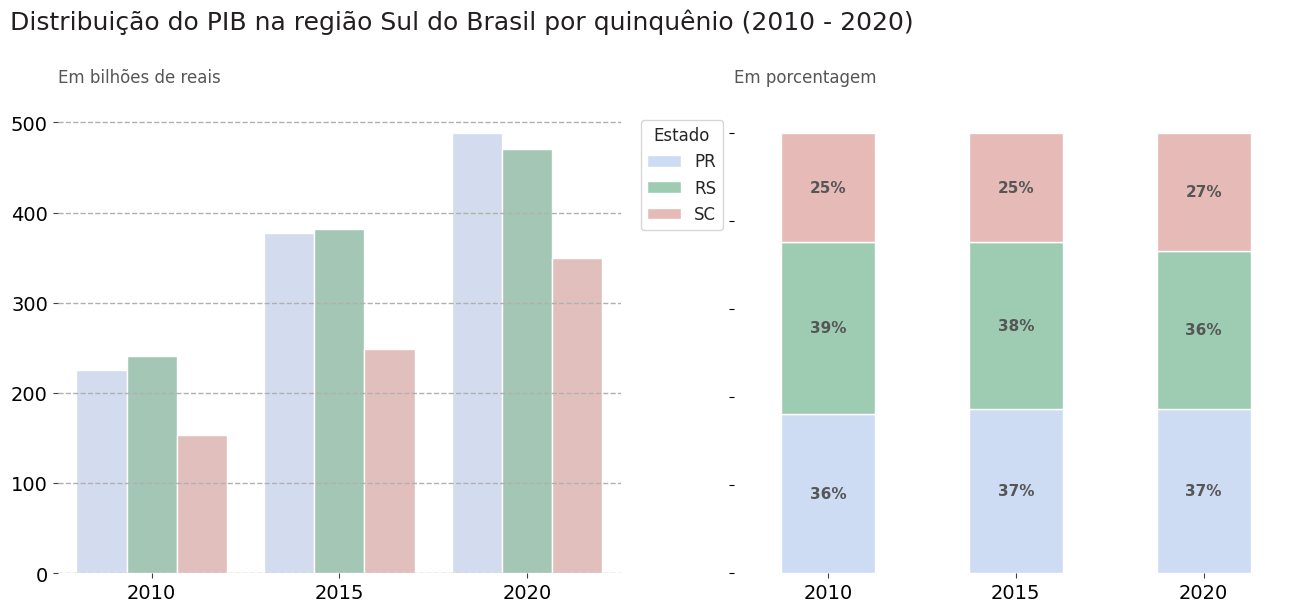

In [12]:
#CODIGO DO GRÁFICO PARA VISUALIZAÇÃO
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.set_theme(style="white")
cores = [AZUL6, VERDE3, VERMELHO2]
fig.suptitle("Distribuição do PIB na região Sul do Brasil por quinquênio (2010 - 2020)",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.66, y = 1.05)
sns.barplot(data = pib_sul, x = 'ano', y = 'pib', hue = 'sigla_uf', hue_order = ['PR', 'RS', 'SC'],
            ax = axs[0], palette = cores)
axs[0].set_title('Em bilhões de reais\n', color = CINZA3, loc = "left")
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].xaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)
axs[0].legend().remove()
axs[0].yaxis.grid(linestyle='--', linewidth=1)

#######################################

pib_sul_cross.plot(kind = 'bar', x = 'ano', stacked = True, color = cores, ax = axs[1])

axs[1].set_title('Em porcentagem\n', color = CINZA3, loc = "left")
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_yticklabels([])
axs[1].xaxis.set_tick_params(labelsize=14, color = CINZA2, labelrotation = 0)
axs[1].set_frame_on(False)


axs[1].legend(bbox_to_anchor=(-0.005, 1), title='Estado', title_fontsize  = 12, fontsize = 12)
for container in axs[1].containers:
    labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 11, color = CINZA3, fontweight = "bold")

#######################################

plt.show()

In [13]:
#TABELA PARA FORMULAÇÃO DE UM GRAFICO QUE ANALISE TODOS AS REGIÕES EM UM ANO, EM PORCENTAGEM
df_va_separado = df_pib.query("ano == 2020")[["regiao", "va_servicos", "va_industria", "va_adespss", "va_agropecuaria"]]
df_va_separado = df_va_separado.reset_index(drop=True)
df_va_separado = df_va_separado.groupby('regiao').agg('sum')
df_va_separado = df_va_separado.div(df_va_separado.sum(axis = 1), axis = 0)
df_va_separado = df_va_separado.sort_values(by = 'va_servicos', axis = 0)
df_va_separado

,va_servicos,va_industria,va_adespss,va_agropecuaria
regiao,,,,
Norte,0.338521,0.323217,0.239485,0.098777
Centro-Oeste,0.435471,0.153645,0.266185,0.144699
Nordeste,0.459790,0.191011,0.260121,0.089078
Sul,0.508060,0.252751,0.139648,0.099541
Sudeste,0.610871,0.228032,0.133536,0.027561


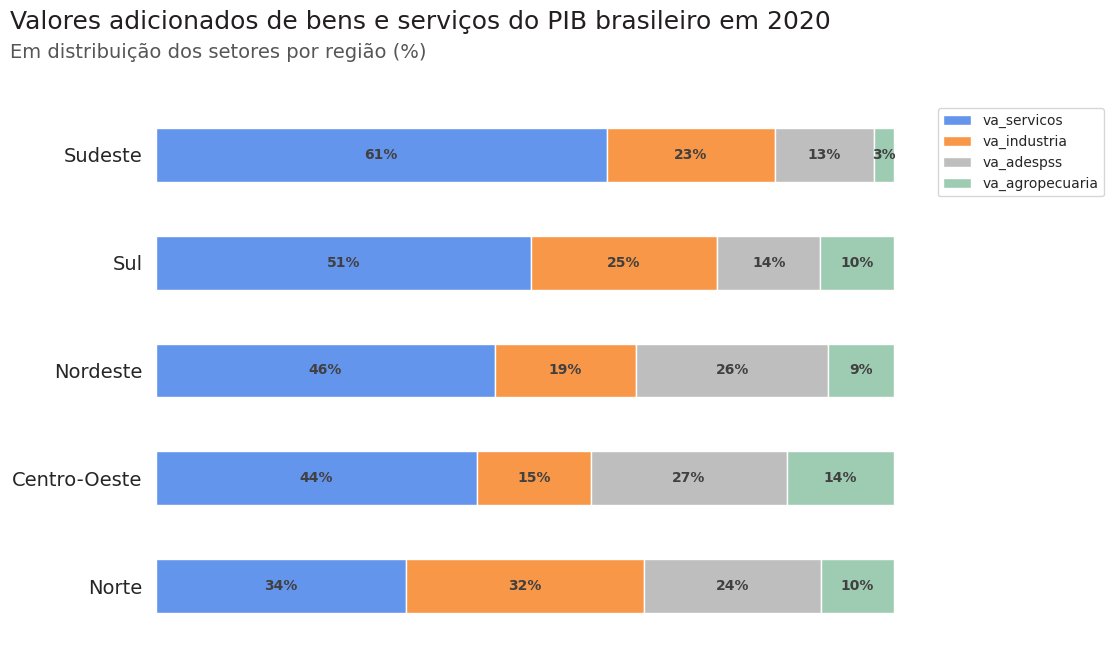

In [14]:
#GERANDO O GRÁFICO
def grafico_va():
  fig, ax = plt.subplots(figsize=(10,7))
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]
  df_va_separado.plot(kind = 'barh', stacked = True, color = cores, ax = ax)
  plt.suptitle('Valores adicionados de bens e serviços do PIB brasileiro em 2020', size=18, color=CINZA1, ha = 'right', x = 0.8, y = 1.01)
  plt.title('Em distribuição dos setores por região (%)\n', fontsize=14, color=CINZA3, pad = 15, ha = "right", x = 0.35)
  ax.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, fontsize = 10, loc='upper left', )
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=14, color = CINZA2)
  ax.set_frame_on(False)
  for container in ax.containers:
      labels = [f'{valor.get_width()*100:.0f}%' for valor in container]
      ax.bar_label(container, label_type='center', labels = labels, size = 10, color = CINZA2, fontweight='bold')

  return ax, cores

ax, cores = grafico_va()

In [15]:
#FUNÇÃO PARA DEFINIR AS CORES DAS LEGENDAS
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

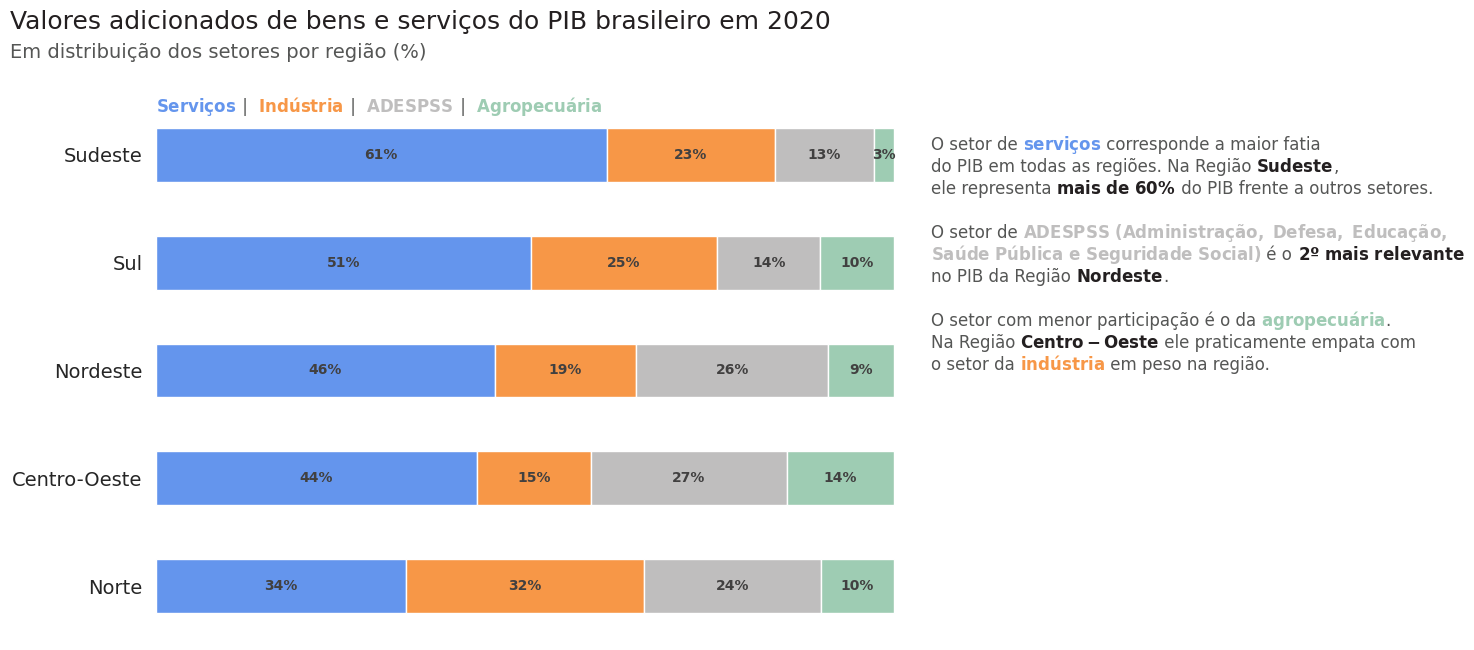

In [16]:
#GRÁFICO COM AS CORES
ax, cores = grafico_va()
ax.legend().remove()
texto_colorido(0, 4.4, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)
texto_colorido(
    1.05, 2,
    'O setor de ||$\\bf{serviços}$|| corresponde a maior fatia\n'
    'do PIB em todas as regiões. Na Região ||$\\bf{Sudeste}$||,\n'
    'ele representa ||$\\bf{mais\ de\ 60\%}$|| do PIB frente a outros setores.\n'
    '\n'
    'O setor de ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$|| é o ||$\\bf{2º\ mais\ relevante}$||\n'
    'no PIB da Região ||$\\bf{Nordeste}$||.\n'
    '\n'
    'O setor com menor participação é o da ||$\\bf{agropecuária}$||.\n'
    'Na Região ||$\\bf{Centro-Oeste}$|| ele praticamente empata com\n'
    'o setor da ||$\\bf{indústria}$|| em peso na região.',
    [[CINZA3, AZUL3, CINZA3],         # linha 1
     [CINZA3, CINZA1, CINZA3],        # linha 2
     [CINZA3, CINZA1, CINZA3],        # linha 3
     [CINZA3],                        # linha 4
     [CINZA3, CINZA5],                # linha 5
     [CINZA5, CINZA3, CINZA1],        # linha 6
     [CINZA3, CINZA1, CINZA3],        # linha 7
     [CINZA3],                        # linha 8
     [CINZA3, VERDE3, CINZA3],        # linha 9
     [CINZA3, CINZA1, CINZA3],        # linha 10
     [CINZA3, LARANJA1, CINZA3]       # linha 11
    ],
    esp=22,
    ax=ax,
    fontsize=12)

fig.show()

In [17]:
#MANIPULANDO A BASE ORIGINAL PARA A CONSTRUÇÂO DE UM GRÁFICO DE ÁREAS
df_agro = df_pib.copy()
df_agro = df_agro[["regiao",  "ano", "va_agropecuaria"]]
df_agro = pd.crosstab(index = df_agro.ano, columns = df_agro.regiao,
                      values = df_agro.va_agropecuaria, aggfunc="sum")
df_agro = (df_agro / 1e9).round(2)
df_agro.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,12.98,17.04,6.40,22.57,22.53
2003,18.70,20.98,8.14,25.71,32.42
2004,20.98,22.44,8.18,28.27,31.05
2005,17.04,22.03,8.53,28.99,24.37
2006,12.15,23.42,8.91,34.44,26.37


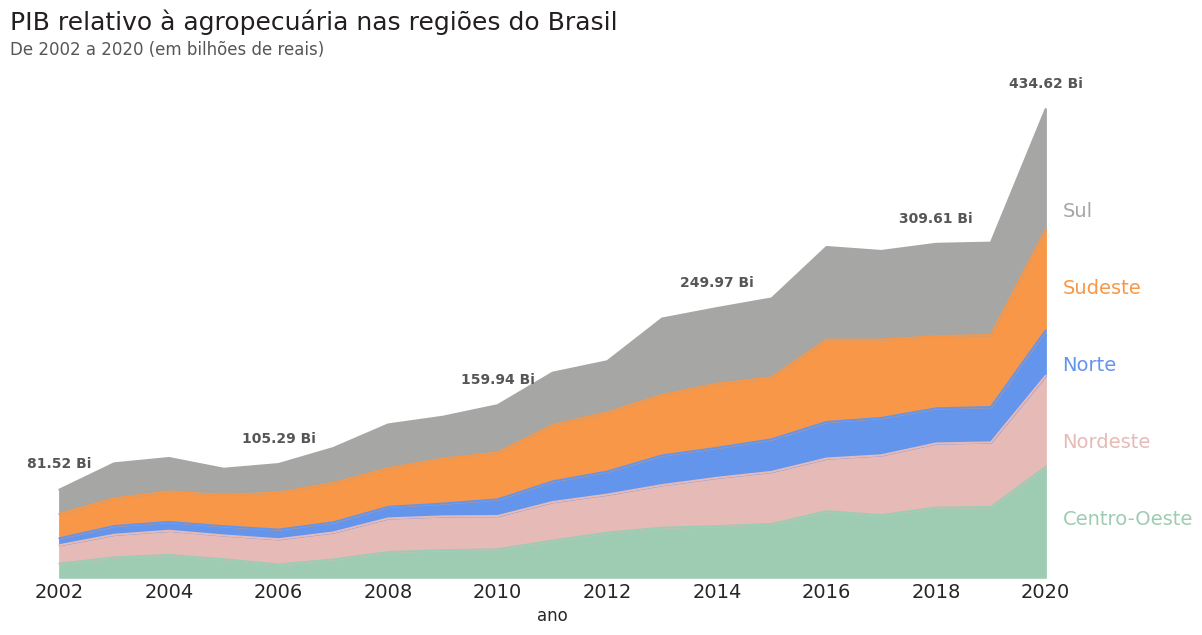

In [18]:
#CRIANDO A VISUALIZAÇÃO DO GRÁFICO
fig, ax = plt.subplots(figsize=(14,7))
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]
df_agro.plot(kind = 'area', stacked = True, color = cores, ax = ax, xticks = range(2002, 2021, 2))
ax.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left')
ax.text(0.29, 0.98, "De 2002 a 2020 (em bilhões de reais)", transform=ax.transAxes, color= CINZA3, fontsize=12, ha='right', va='center')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14, color = CINZA2)
ax.legend().remove()
ax.set_frame_on(False)
reg = list(reversed(df_agro.columns))
cor = list(reversed(cores))
for i in range(len(reg)):
  ax.text(0.97, (0.67 - i/7), f'{reg[i]}', fontsize=14, color = cor[i], transform=ax.transAxes)
plt.ylim(0, 500)
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
agregado_ano = list(df_agro.sum(axis=1).round(2))
for i in range(0, len(df_agro.index), 4):
  ax.text(x = df_agro.index[i], y = agregado_ano[i] + 20, s = f"{agregado_ano[i]} Bi", color = CINZA3, weight = "bold", fontsize = 10, ha="center")
ax.text(x = df_agro.index[-1], y = agregado_ano[-1] + 20, s = f"{agregado_ano[-1]} Bi", color = CINZA3, weight = "bold", fontsize = 10, ha="center")

plt.show()

In [19]:
#CONSTRUÇÃO DE UM GRÁFICO DE LINHAS
df_agro_slope = df_pib.query("ano == [2002, 2020]")[["regiao",  "ano", "va_agropecuaria"]]
df_agro_slope = pd.crosstab(index = df_agro_slope.ano, columns = df_agro_slope.regiao,
                      values = df_agro_slope.va_agropecuaria, aggfunc="sum", normalize="index")
df_agro_slope = (df_agro_slope * 100).round(1)
df_agro_slope.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,15.9,20.9,7.9,27.7,27.6
2020,23.6,19.4,9.7,21.5,25.8


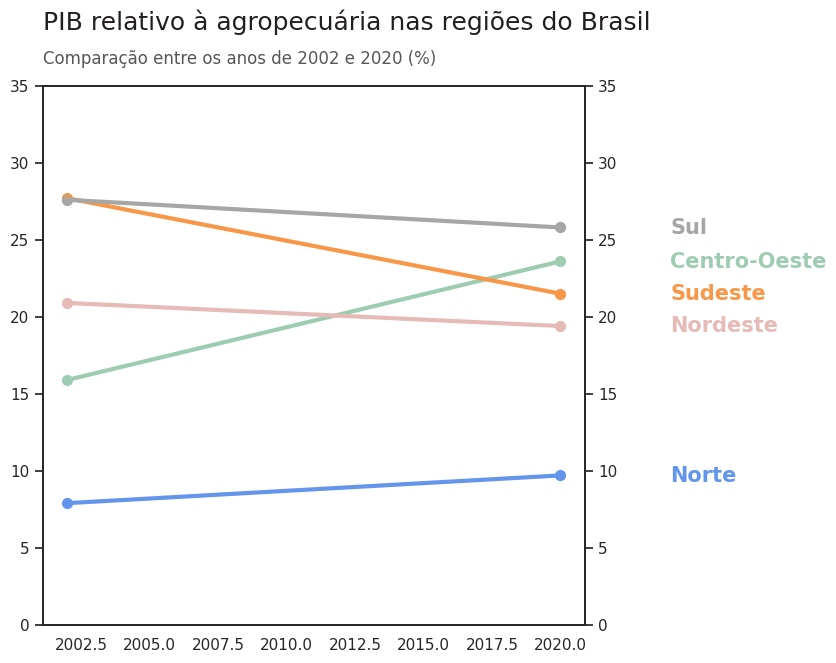

In [22]:
#GERANDO O GRÁFICO
def grafico_slope_agro():
  fig, ax1 = plt.subplots(figsize=(7,7))
  cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]
  ax2 = ax1.twinx()
  ax1.set_ylim([0, 35])
  ax2.set_ylim([0, 35])
  for i in range(5):
    ax1.scatter(x = df_agro_slope.index, y = df_agro_slope.iloc[:, i], color = cores[i], s =50)
    ax1.plot(df_agro_slope.index, df_agro_slope.iloc[:, i], color = cores[i], lw = 3)
    ax1.text(x = 2024, y = df_agro_slope.iloc[-1,i], s = df_agro_slope.columns[i],
            fontsize=15, fontweight = 'bold', linespacing=1.5, color=cores[i], va='center')
  ax1.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
  ax1.text(0, 1.05, "Comparação entre os anos de 2002 e 2020 (%)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_agro()

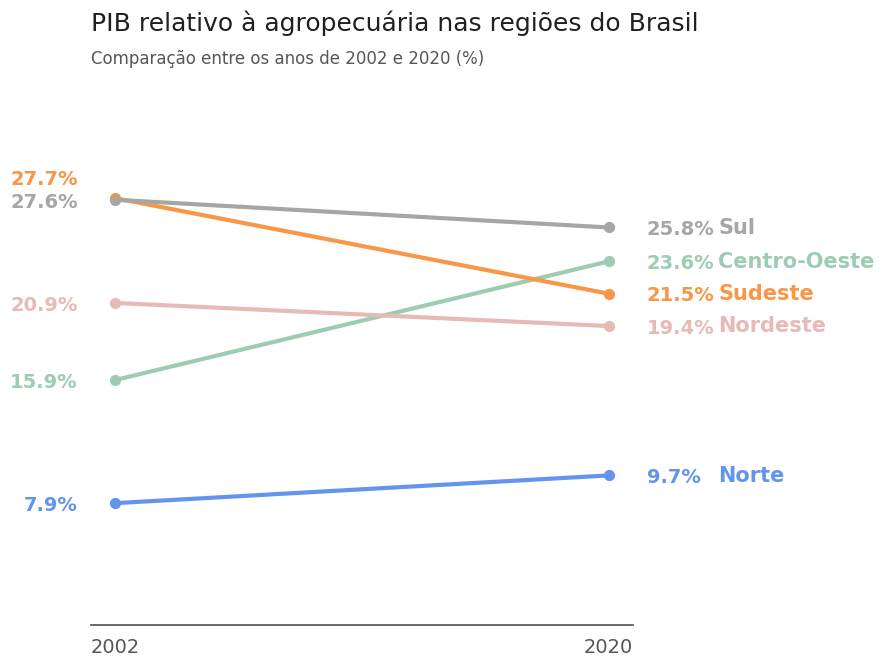

In [23]:
#PERSONALIZAÇÃO PARA VISUALIZACAO
ax1, ax2, cores = grafico_slope_agro()
ax1.tick_params(left = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)
plt.setp(ax1, xticks = [2002,2020], xticklabels = ['2002', '2020'],
         yticks = df_agro_slope.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 3 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_agro_slope.iloc[0,:])])
plt.setp(ax2,
         yticks = df_agro_slope.iloc[1,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_agro_slope.iloc[1,:])])
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()